In [ ]:
#Q1
import pandas as pd

# Load the dataset
df = pd.read_csv('spam.csv')  
print(df.head())


  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [6]:
# Map labels to binary values
df['Category'] = df['Category'].map({'spam': 1, 'ham': 0})
print(df.head())

   Category                                            Message
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
3         0  U dun say so early hor... U c already then say...
4         0  Nah I don't think he goes to usf, he lives aro...


In [8]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_message'] = df['Message'].apply(preprocess_text)
print(df.head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dhruv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dhruv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   Category                                            Message  \
0         0  Go until jurong point, crazy.. Available only ...   
1         0                      Ok lar... Joking wif u oni...   
2         1  Free entry in 2 a wkly comp to win FA Cup fina...   
3         0  U dun say so early hor... U c already then say...   
4         0  Nah I don't think he goes to usf, he lives aro...   

                                     cleaned_message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                u dun say early hor u c already say  
4        nah dont think goes usf lives around though  


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df['cleaned_message']) 


In [ ]:
from sklearn.model_selection import train_test_split

X = vectorizer.transform(df['cleaned_message'])
y = df['Category']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (4457, 9426)
Testing data shape: (1115, 9426)


In [16]:
class_distribution = df['Category'].value_counts()
print(class_distribution)

Category
0    4825
1     747
Name: count, dtype: int64


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


Train accuracy: 0.8833
Test accuracy: 0.8906
Confusion Matrix (Test Set):
[[929  37]
 [ 85  64]]


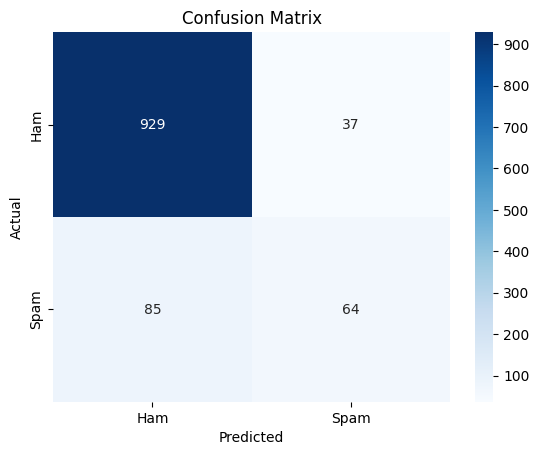

In [19]:
clf = DecisionTreeClassifier(max_depth=1, random_state=42)

clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")
print("Confusion Matrix (Test Set):")
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Reason for low accuracy:
Limited Representation: A decision stump only looks at one feature, whereas text data has many complex features (words, phrases, context). It can't capture the rich patterns in the text with just a single feature.
High Dimensionality: In text data, there can be thousands of features (words, n-grams, etc.) extracted from the TF-IDF vectorizer. A decision stump, which only considers a single feature, cannot handle this high-dimensionality effectively.
Over-simplification: A decision stump makes decisions based on a single criterion (a single word or token), so it oversimplifies the problem. For instance, knowing the presence of just one word, such as "free," may not be enough to classify a message as spam or ham accurately.

Starting Manual AdaBoost (T=15)

 Iteration 1 
Alpha: 1.0122
Weighted Error: 0.1167
Misclassified indices (first 5): [ 0  4 37 38 45]
Weights of misclassified (first 5): [0.000224 0.000224 0.000224 0.000224 0.000224]

 Iteration 2 
Alpha: 0.5010
Weighted Error: 0.2685
Misclassified indices (first 5): [ 0  4  7 15 17]
Weights of misclassified (first 5): [0.000962 0.000962 0.000127 0.000127 0.000127]

 Iteration 3 
Alpha: 0.3151
Weighted Error: 0.3475
Misclassified indices (first 5): [1 2 3 5 6]
Weights of misclassified (first 5): [8.7e-05 8.7e-05 8.7e-05 8.7e-05 8.7e-05]

 Iteration 4 
Alpha: 0.2937
Weighted Error: 0.3573
Misclassified indices (first 5): [ 0  7 15 17 37]
Weights of misclassified (first 5): [0.001372 0.000181 0.000181 0.000181 0.001372]

 Iteration 5 
Alpha: 0.1166
Weighted Error: 0.4419
Misclassified indices (first 5): [1 2 3 5 6]
Weights of misclassified (first 5): [9.7e-05 9.7e-05 9.7e-05 9.7e-05 9.7e-05]

 Iteration 6 
Alpha: 0.1705
Weighted Error: 0.4155
Misclassifi

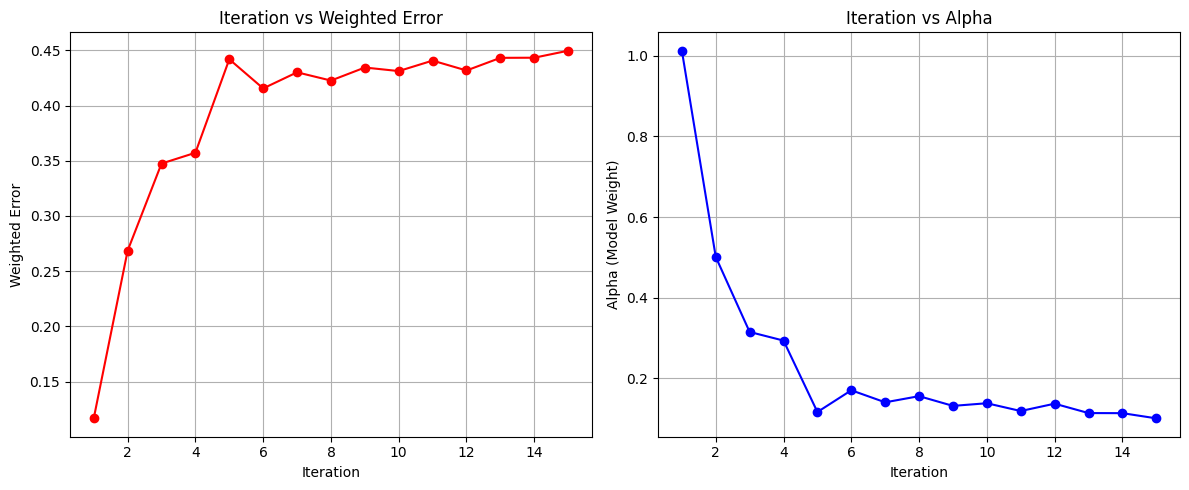


Confusion Matrix (Test Set):
[[960   6]
 [ 77  72]]


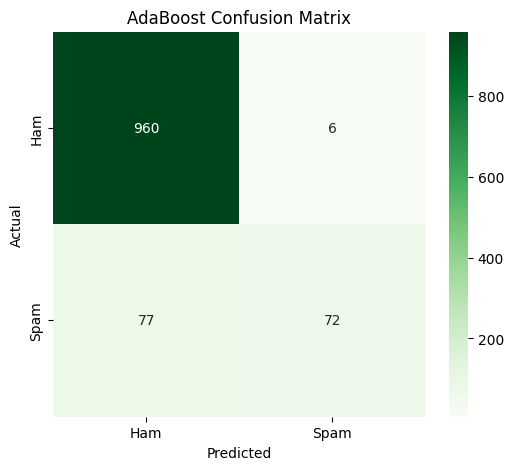

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

n_train = X_train.shape[0]
n_test = X_test.shape[0]

w = np.ones(n_train) / n_train

n_rounds = 15
models = []
alphas = []
weighted_errors = []

print(f"Starting Manual AdaBoost (T={n_rounds})")

for t in range(n_rounds):
    clf = DecisionTreeClassifier(max_depth=1, random_state=42)
    clf.fit(X_train, y_train, sample_weight=w)
    y_pred_train = clf.predict(X_train)
    
    misclassified = (y_pred_train != y_train)
    
    error = np.sum(w[misclassified])
    
    epsilon = 1e-10
    error = np.clip(error, epsilon, 1 - epsilon)
    weighted_errors.append(error)
    
    alpha = 0.5 * np.log((1 - error) / error)
    alphas.append(alpha)
    
    misclassified_indices = np.where(misclassified)[0]
    misclassified_weights = w[misclassified]
    
    print(f"\n Iteration {t+1} ")
    print(f"Alpha: {alpha:.4f}")
    print(f"Weighted Error: {error:.4f}")
    print(f"Misclassified indices (first 5): {misclassified_indices[:5]}") 
    print(f"Weights of misclassified (first 5): {np.round(misclassified_weights[:5], 6)}")
    
    update_factors = np.where(misclassified, np.exp(alpha), np.exp(-alpha))
    w = w * update_factors
    
    w = w / np.sum(w)

    models.append(clf)

print(f"\n{'='*20} Training Complete {'='*20}")

def adaboost_predict(X_input, models, alphas):
    n_samples = X_input.shape[0]
    pred_scores = np.zeros(n_samples)
    
    for model, alpha in zip(models, alphas):
        preds = model.predict(X_input)
        preds_signed = np.where(preds == 0, -1, 1)
        pred_scores += alpha * preds_signed
    
    final_preds = np.where(pred_scores >= 0, 1, 0)
    return final_preds

y_train_final = adaboost_predict(X_train, models, alphas)
y_test_final = adaboost_predict(X_test, models, alphas)

train_acc = accuracy_score(y_train, y_train_final)
test_acc = accuracy_score(y_test, y_test_final)

print(f"\nFinal Train Accuracy: {train_acc:.4f}")
print(f"Final Test Accuracy:  {test_acc:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, n_rounds + 1), weighted_errors, marker='o', color='red')
plt.title('Iteration vs Weighted Error')
plt.xlabel('Iteration')
plt.ylabel('Weighted Error')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, n_rounds + 1), alphas, marker='o', color='blue')
plt.title('Iteration vs Alpha')
plt.xlabel('Iteration')
plt.ylabel('Alpha (Model Weight)')
plt.grid(True)

plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test, y_test_final)
print("\nConfusion Matrix (Test Set):")
print(cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('AdaBoost Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

==================== Sklearn AdaBoost Results ====================
Train Accuracy: 0.9163
Test Accuracy:  0.9229

Confusion Matrix (Test Set):
[[963   3]
 [ 83  66]]


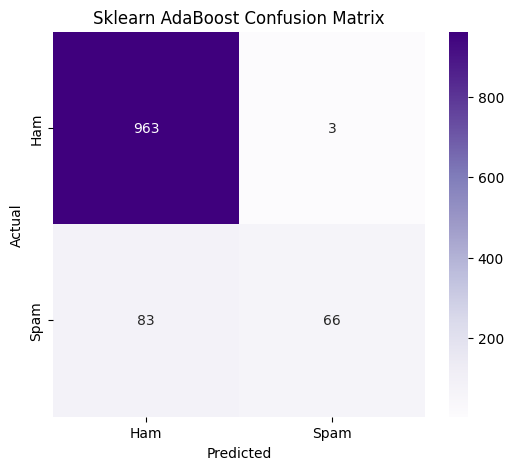

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

ada_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1), 
    n_estimators=100,
    learning_rate=0.6,
    random_state=42
)

ada_clf.fit(X_train, y_train)

y_train_pred_sk = ada_clf.predict(X_train)
y_test_pred_sk = ada_clf.predict(X_test)

train_acc_sk = accuracy_score(y_train, y_train_pred_sk)
test_acc_sk = accuracy_score(y_test, y_test_pred_sk)
conf_matrix_sk = confusion_matrix(y_test, y_test_pred_sk)

print(f"{'='*20} Sklearn AdaBoost Results {'='*20}")
print(f"Train Accuracy: {train_acc_sk:.4f}")
print(f"Test Accuracy:  {test_acc_sk:.4f}")
print("\nConfusion Matrix (Test Set):")
print(conf_matrix_sk)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_sk, annot=True, fmt='d', cmap='Purples', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Sklearn AdaBoost Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Dataset shape after preprocessing: (297, 14)
Class distribution:
target
0    160
1    137
Name: count, dtype: int64

==================== Decision Stump Results ====================
Training Accuracy: 0.7595
Testing Accuracy:  0.6833

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.74      0.72      0.73        36
           1       0.60      0.62      0.61        24

    accuracy                           0.68        60
   macro avg       0.67      0.67      0.67        60
weighted avg       0.69      0.68      0.68        60



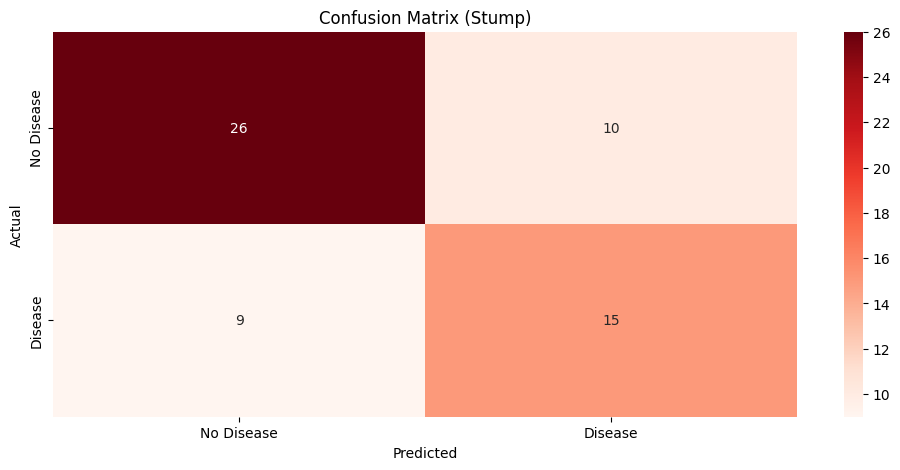

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

df = pd.read_csv(url, names=column_names, na_values='?')

df = df.dropna()

df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dataset shape after preprocessing: {df.shape}")
print(f"Class distribution:\n{df['target'].value_counts()}")

stump = DecisionTreeClassifier(max_depth=1, random_state=42)
stump.fit(X_train, y_train)

y_train_pred = stump.predict(X_train)
y_test_pred = stump.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"\n{'='*20} Decision Stump Results {'='*20}")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(12, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix (Stump)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

 Grid Search Results 

Learning Rate: 0.1
  n_estimators=5: Accuracy=0.9000
  n_estimators=10: Accuracy=0.9000
  n_estimators=25: Accuracy=0.9000
  n_estimators=50: Accuracy=0.9000
  n_estimators=100: Accuracy=0.8833

Learning Rate: 0.5
  n_estimators=5: Accuracy=0.9000
  n_estimators=10: Accuracy=0.8667
  n_estimators=25: Accuracy=0.8333
  n_estimators=50: Accuracy=0.8500
  n_estimators=100: Accuracy=0.8833

Learning Rate: 0.5
  n_estimators=5: Accuracy=0.9000
  n_estimators=10: Accuracy=0.8667
  n_estimators=25: Accuracy=0.8333
  n_estimators=50: Accuracy=0.8500
  n_estimators=100: Accuracy=0.8667

Learning Rate: 1.0
  n_estimators=5: Accuracy=0.8500
  n_estimators=10: Accuracy=0.8333
  n_estimators=25: Accuracy=0.8667
  n_estimators=50: Accuracy=0.8667
  n_estimators=100: Accuracy=0.8667

Learning Rate: 1.0
  n_estimators=5: Accuracy=0.8500
  n_estimators=10: Accuracy=0.8333
  n_estimators=25: Accuracy=0.8667
  n_estimators=50: Accuracy=0.8667
  n_estimators=100: Accuracy=0.8667

BE

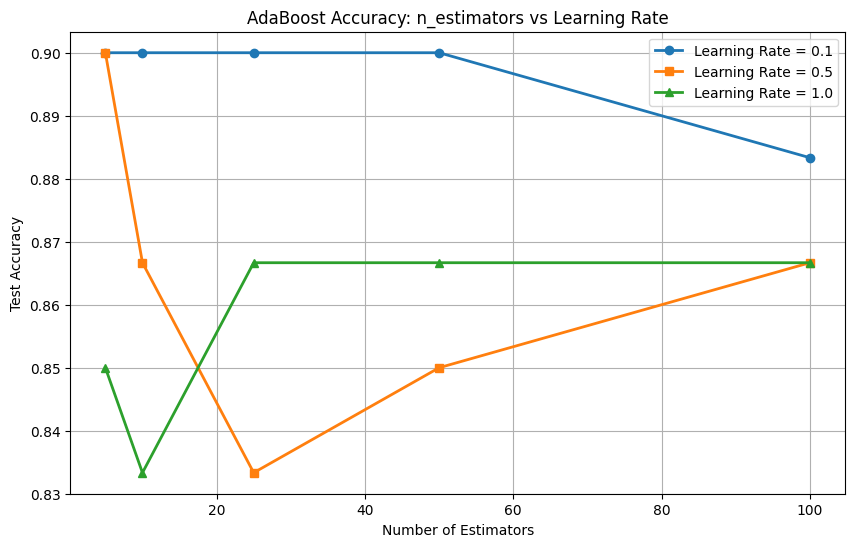

In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

n_estimators_list = [5, 10, 25, 50, 100]
learning_rates = [0.1, 0.5, 1.0]

results = {} 

best_accuracy = 0.0
best_config = ""

print(f" Grid Search Results ")

for lr in learning_rates:
    accuracies = []
    print(f"\nLearning Rate: {lr}")
    
    for n_est in n_estimators_list:
        clf = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=1),
            n_estimators=n_est,
            learning_rate=lr,
            random_state=42
        )
        
        clf.fit(X_train, y_train)
        
        preds = clf.predict(X_test)
        acc = accuracy_score(y_test, preds)
        accuracies.append(acc)
        
        print(f"  n_estimators={n_est}: Accuracy={acc:.4f}")
        
        if acc > best_accuracy:
            best_accuracy = acc
            best_config = f"LR={lr}, n_estimators={n_est}"
            
    results[lr] = accuracies

print(f"\n{'='*30}")
print(f"BEST CONFIGURATION: {best_config}")
print(f"BEST ACCURACY:      {best_accuracy:.4f}")
print(f"{'='*30}")

plt.figure(figsize=(10, 6))

markers = ['o', 's', '^']
for i, lr in enumerate(learning_rates):
    plt.plot(n_estimators_list, results[lr], marker=markers[i], linewidth=2, label=f'Learning Rate = {lr}')

plt.title('AdaBoost Accuracy: n_estimators vs Learning Rate')
plt.xlabel('Number of Estimators')
plt.ylabel('Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

c:\Users\dhruv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\dhruv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\dhruv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\dhruv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\dhruv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has fe

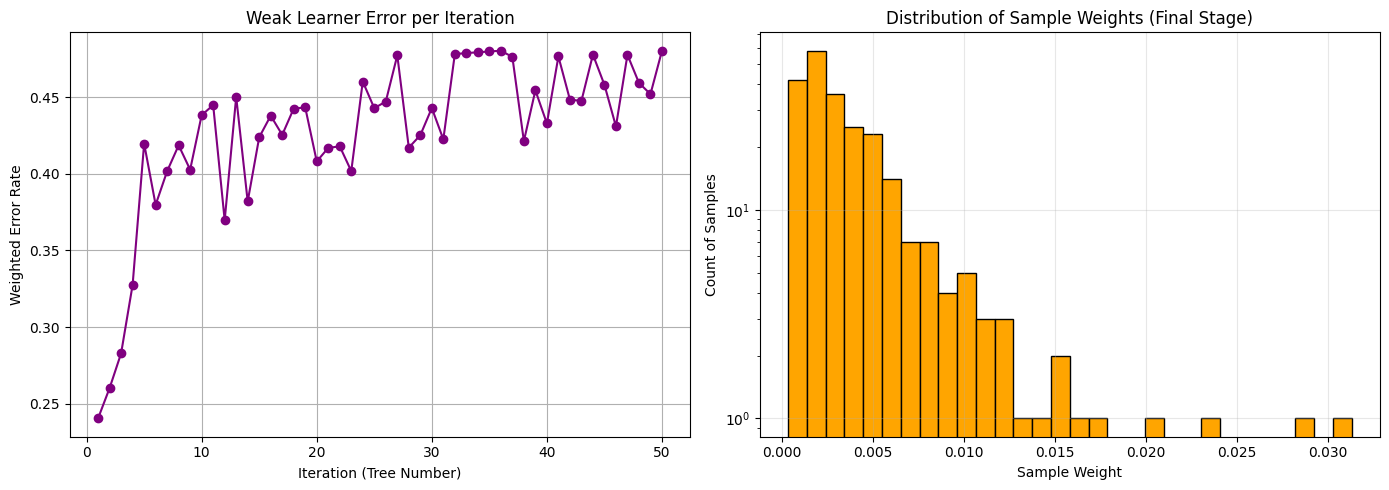


==================== Top 3  Samples ====================
      age  sex   cp  thal  actual_target  final_weight
145  47.0  1.0  3.0   3.0              1      0.031334
252  64.0  1.0  4.0   7.0              0      0.028572
32   64.0  1.0  3.0   3.0              1      0.023147


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

best_n_estimators = 50
best_learning_rate = 0.5

ada_best = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=best_n_estimators,
    learning_rate=best_learning_rate,
    random_state=42
)

ada_best.fit(X_train, y_train)

learner_errors = ada_best.estimator_errors_

n_samples = len(y_train)
sample_weights = np.ones(n_samples) / n_samples

for i, stump in enumerate(ada_best.estimators_):
    pred = stump.predict(X_train)
    
    incorrect = (pred != y_train).astype(int)
    
    estimator_weight = ada_best.estimator_weights_[i]
    
    sample_weights *= np.exp(estimator_weight * incorrect)
    
    sample_weights /= np.sum(sample_weights)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(learner_errors) + 1), learner_errors, marker='o', color='purple')
plt.title('Weak Learner Error per Iteration')
plt.xlabel('Iteration (Tree Number)')
plt.ylabel('Weighted Error Rate')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(sample_weights, bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Sample Weights (Final Stage)')
plt.xlabel('Sample Weight')
plt.ylabel('Count of Samples')
plt.yscale('log')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

if not isinstance(X_train, pd.DataFrame):
    X_train_df = pd.DataFrame(X_train)
    y_train_series = pd.Series(y_train)
else:
    X_train_df = X_train
    y_train_series = y_train

analysis_df = X_train_df.copy()
analysis_df['actual_target'] = y_train_series
analysis_df['final_weight'] = sample_weights

top_hard_samples = analysis_df.sort_values(by='final_weight', ascending=False).head(3)

print(f"\n{'='*20} Top 3  Samples {'='*20}")
print(top_hard_samples[['age', 'sex', 'cp', 'thal', 'actual_target', 'final_weight']])

Which samples got the highest weights? The samples with the highest weights are the "hardest" cases, the outliers or boundary cases. In the context of Heart Disease, these are likely patients whose symptoms contradict the general rules learned by the model (e.g., a patient who appears healthy based on most metrics but actually has heart disease, or vice versa).

Why does AdaBoost focus on them? AdaBoost is designed to be adaptive. When a sample is misclassified by a weak learner, its weight is increased (boosted). This forces the next weak learner in the sequence to prioritize correctly classifying these specific high-weight samples to minimize the weighted error. Over many iterations, the samples that are consistently difficult to classify accumulate very large weights.

==================== Top 5 Most Important Features ====================
     Feature  Importance
9    oldpeak    0.183080
3   trestbps    0.140602
11        ca    0.131063
7    thalach    0.101127
12      thal    0.094825


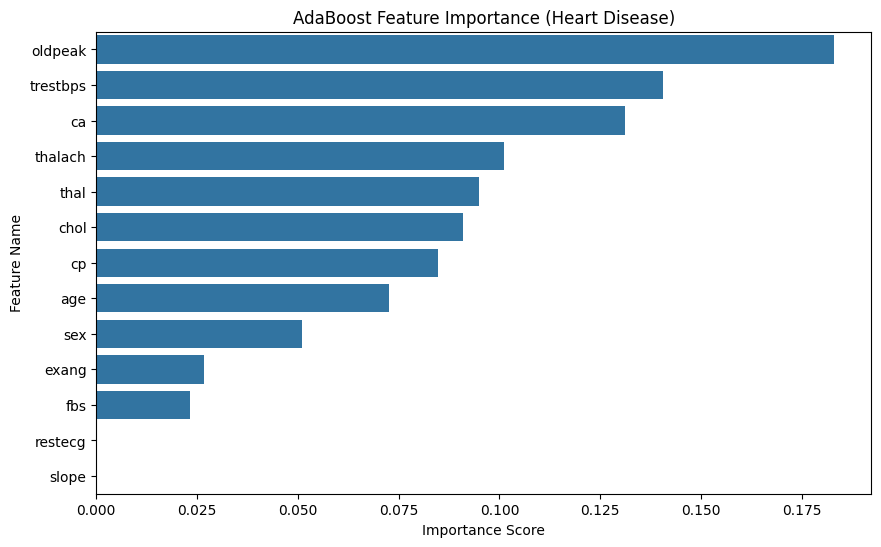

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

importances = ada_best.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_5_features = feature_importance_df.head(5)

print(f"{'='*20} Top 5 Most Important Features {'='*20}")
print(top_5_features)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('AdaBoost Feature Importance (Heart Disease)')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.show()

Medical Interpretation of Top Features
1.cp (Chest Pain Type):
Why it matters: This is usually the single strongest predictor. "Typical angina" (chest pain caused by reduced blood flow to the heart) is the most direct symptom of Coronary Artery Disease.

2.thal (Thallium Stress Test Result):
Why it matters: This diagnostic test measures how blood flows to the heart muscle during exercise versus rest. A "reversible defect" (blood flow is normal at rest but blocked during exercise) is a clinical hallmark of ischemia (restricted blood supply).

3.ca (Number of Major Vessels Colored by Fluoroscopy):
Why it matters: Fluoroscopy uses dye to visualize blood vessels. If the dye cannot pass through (0 vessels colored), it often indicates severe blockage or narrowing (stenosis) of the coronary arteries.

4.oldpeak (ST Depression Induced by Exercise):
Why it matters:
On an ECG, "ST depression" during a workout is an electrical signal that the heart muscle is starving for oxygen (ischemia). The deeper the depression (higher oldpeak value), the more severe the disease.

5.thalach (Maximum Heart Rate Achieved):
Why it matters: A healthy heart can elevate its rate significantly during stress to pump more blood. A heart affected by disease often struggles to reach a high heart rate (chronotropic incompetence) or is limited by pain/breathlessness before reaching it.

In [37]:
#Q3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

columns = ['user_id', 'activity', 'timestamp', 'x_accel', 'y_accel', 'z_accel']

df = pd.read_csv('WISDM_ar_v1.1_raw.txt', header=None, names=columns, on_bad_lines='skip')

df['z_accel'] = df['z_accel'].astype(str).str.replace(';', '', regex=False)

df['x_accel'] = pd.to_numeric(df['x_accel'], errors='coerce')
df['y_accel'] = pd.to_numeric(df['y_accel'], errors='coerce')
df['z_accel'] = pd.to_numeric(df['z_accel'], errors='coerce')

df.dropna(subset=['x_accel', 'y_accel', 'z_accel', 'activity'], inplace=True)

vigorous_activities = ['Jogging', 'Upstairs']

df['label'] = df['activity'].apply(lambda x: 1 if x in vigorous_activities else 0)

print(df['label'].value_counts())

X = df[['x_accel', 'y_accel', 'z_accel']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape:  {X_test.shape}")

label
0    627151
1    459314
Name: count, dtype: int64
Training Data Shape: (760525, 3)
Testing Data Shape:  (325940, 3)
Training Data Shape: (760525, 3)
Testing Data Shape:  (325940, 3)


 Decision Stump Results 
Train Accuracy: 0.6521
Test Accuracy:  0.6519

Confusion Matrix (Test Set):
[[170673  17473]
 [ 95986  41808]]


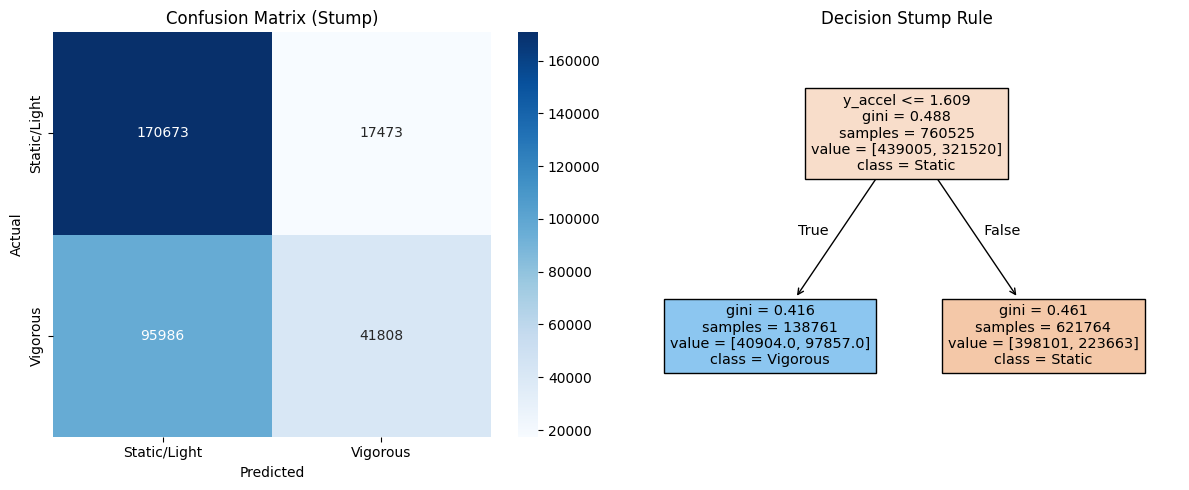

In [38]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

stump = DecisionTreeClassifier(max_depth=1, random_state=42)
stump.fit(X_train, y_train)

y_train_pred = stump.predict(X_train)
y_test_pred = stump.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f" Decision Stump Results ")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")

cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Test Set):")
print(cm)

plt.figure(figsize=(12, 5))

# Plot Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Static/Light', 'Vigorous'], 
            yticklabels=['Static/Light', 'Vigorous'])
plt.title('Confusion Matrix (Stump)')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Plot the Tree Node
plt.subplot(1, 2, 2)
plot_tree(stump, feature_names=['x_accel', 'y_accel', 'z_accel'], 
          class_names=['Static', 'Vigorous'], filled=True)
plt.title('Decision Stump Rule')

plt.tight_layout()
plt.show()

==================== Starting Manual AdaBoost (T=20) ====================

--- Iteration 1 ---
Alpha: 0.3142 | Error: 0.3479
Misclassified indices (first 5): [0 2 3 5 6]
Weights of these samples: [1.e-06 1.e-06 1.e-06 1.e-06 1.e-06]

--- Iteration 1 ---
Alpha: 0.3142 | Error: 0.3479
Misclassified indices (first 5): [0 2 3 5 6]
Weights of these samples: [1.e-06 1.e-06 1.e-06 1.e-06 1.e-06]

--- Iteration 2 ---
Alpha: 0.0703 | Error: 0.4649
Misclassified indices (first 5): [0 1 2 5 6]
Weights of these samples: [2.e-06 1.e-06 2.e-06 2.e-06 2.e-06]

--- Iteration 2 ---
Alpha: 0.0703 | Error: 0.4649
Misclassified indices (first 5): [0 1 2 5 6]
Weights of these samples: [2.e-06 1.e-06 2.e-06 2.e-06 2.e-06]

--- Iteration 3 ---
Alpha: 0.1026 | Error: 0.4489
Misclassified indices (first 5): [ 4  7  9 11 14]
Weights of these samples: [1.e-06 2.e-06 1.e-06 1.e-06 1.e-06]

--- Iteration 3 ---
Alpha: 0.1026 | Error: 0.4489
Misclassified indices (first 5): [ 4  7  9 11 14]
Weights of these samples:

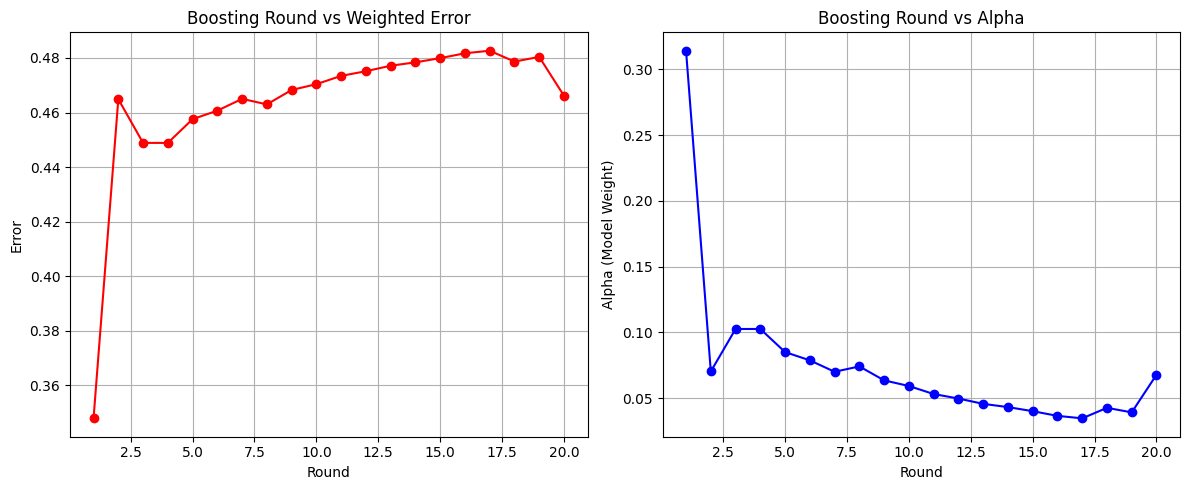


Confusion Matrix (Test Set):
[[164614  23532]
 [ 75750  62044]]


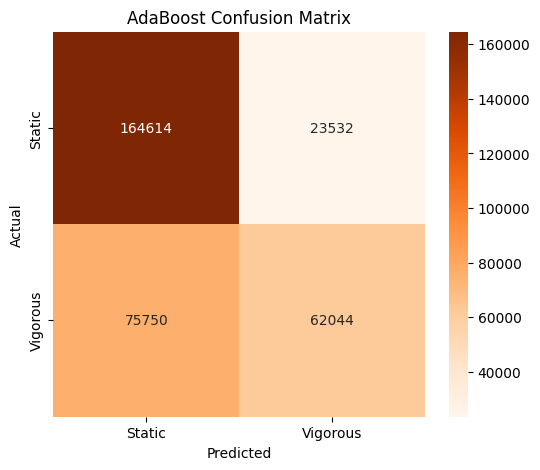

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

n_train = X_train.shape[0]
n_test = X_test.shape[0]

w = np.ones(n_train) / n_train

n_rounds = 20
models = []
alphas = []
weighted_errors = []

print(f"{'='*20} Starting Manual AdaBoost (T={n_rounds}) {'='*20}")

for t in range(n_rounds):
    stump = DecisionTreeClassifier(max_depth=1, random_state=42)
    stump.fit(X_train, y_train, sample_weight=w)
    
    y_pred_train = stump.predict(X_train)
    
    misclassified = (y_pred_train != y_train)
    
    error = np.sum(w[misclassified])
    
    epsilon = 1e-10
    error = np.clip(error, epsilon, 1 - epsilon)
    weighted_errors.append(error)
    
    alpha = 0.5 * np.log((1 - error) / error)
    alphas.append(alpha)
    
    bad_indices = np.where(misclassified)[0]
    bad_weights = w[misclassified]
    
    print(f"\n--- Iteration {t+1} ---")
    print(f"Alpha: {alpha:.4f} | Error: {error:.4f}")
    print(f"Misclassified indices (first 5): {bad_indices[:5]}") 
    print(f"Weights of these samples: {np.round(bad_weights[:5], 6)}")
    
    update_factors = np.where(misclassified, np.exp(alpha), np.exp(-alpha))
    w = w * update_factors
    w = w / np.sum(w) 

    models.append(stump)

print(f"\n{'='*20} Training Complete {'='*20}")

def adaboost_predict(X_input, models, alphas):
    n_samples = X_input.shape[0]
    pred_scores = np.zeros(n_samples)
    
    for model, alpha in zip(models, alphas):
        preds = model.predict(X_input)
        preds_signed = np.where(preds == 0, -1, 1)
        
        pred_scores += alpha * preds_signed
    
    return np.where(pred_scores >= 0, 1, 0)

y_train_final = adaboost_predict(X_train, models, alphas)
y_test_final = adaboost_predict(X_test, models, alphas)

train_acc = accuracy_score(y_train, y_train_final)
test_acc = accuracy_score(y_test, y_test_final)

print(f"\nFinal Train Accuracy: {train_acc:.4f}")
print(f"Final Test Accuracy:  {test_acc:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, n_rounds + 1), weighted_errors, marker='o', color='red')
plt.title('Boosting Round vs Weighted Error')
plt.xlabel('Round')
plt.ylabel('Error')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, n_rounds + 1), alphas, marker='o', color='blue')
plt.title('Boosting Round vs Alpha')
plt.xlabel('Round')
plt.ylabel('Alpha (Model Weight)')
plt.grid(True)

plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test, y_test_final)
print("\nConfusion Matrix (Test Set):")
print(cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Static', 'Vigorous'], 
            yticklabels=['Static', 'Vigorous'])
plt.title('AdaBoost Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

==================== Sklearn AdaBoost (T=100) ====================
Train Accuracy: 0.6976
Test Accuracy:  0.6969

Confusion Matrix (Test Set):
[[164210  23936]
 [ 74851  62943]]


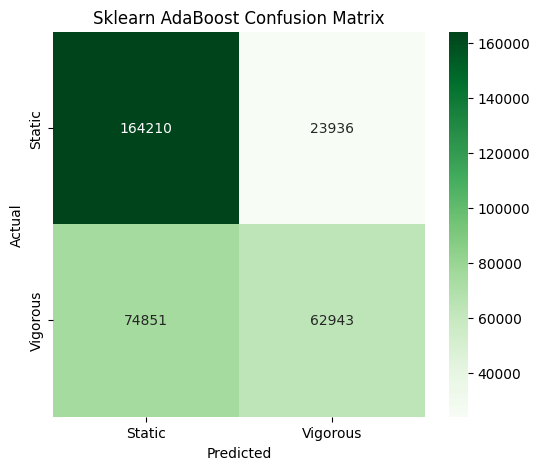

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

ada_sklearn = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

ada_sklearn.fit(X_train, y_train)

y_train_pred_sk = ada_sklearn.predict(X_train)
y_test_pred_sk = ada_sklearn.predict(X_test)

train_acc_sk = accuracy_score(y_train, y_train_pred_sk)
test_acc_sk = accuracy_score(y_test, y_test_pred_sk)

print(f"{'='*20} Sklearn AdaBoost (T=100) {'='*20}")
print(f"Train Accuracy: {train_acc_sk:.4f}")
print(f"Test Accuracy:  {test_acc_sk:.4f}")

cm_sk = confusion_matrix(y_test, y_test_pred_sk)
print("\nConfusion Matrix (Test Set):")
print(cm_sk)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_sk, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Static', 'Vigorous'], 
            yticklabels=['Static', 'Vigorous'])
plt.title('Sklearn AdaBoost Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()